In [2]:
#It is just for developing purpose, No need to do this for your usage
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent / "src"))

In [3]:
import warnings
warnings.simplefilter('ignore')

##### **Setup directories and download HUC8**
**To run the plots especially synthetic rating curves and streamflow comparisions, user need to have the systematic folder structure so run this code before proceeding for your desired HUC**

In [4]:
import owphandfim as fm
import pandas as pd

huc = "03020202"

# Download the data for one huc
fm.DownloadHUC8(huc)

#For multiple HUC
# huc = pd.read_csv('.HUC.csv')
# for i in huc['HUC']:
#     fm.DownloadHUC8(i)

#If user wants to run for only certain streamoorders
# stream_order = [6, 5]

# fm.DownloadHUC8(huc, stream_order)


Repository already exists at /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/code/inunation-mapping and contains files. Skipping clone.
Data for HUC 03020202
Copied the first row of /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202/branch_ids.csv to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/fim_inputs.csv as fim_inputs.csv.
Unique feature IDs saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/feature_IDs.csv.


#### **Get the NWM Data**

In [4]:
start_date = "2019-01-01"
end_date = "2020-01-03"

#If user just wants to download the data without mentioning specific date or datetime to run FIM
# fm.getNWMretrospectivedata(start_date, end_date, huc)

# OR if uder wants to run for specific date or datetime, if user wants to run for day, just mention the date, otherwise mention the datetime
#Any numbers are acceptable to filter the discharge but it should be within above mentioned start and end data
#For the date only, it will take the mean of hourly data
value_times = ["2020-01-01 00:00:00", "2020-01-03"]
fm.getNWMretrospectivedata(start_date, end_date, huc, value_times)

NWM discharge data saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/discharge/nwm30_retrospective.
Discharge values saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/data/inputs/20200101000000_03020202.csv
Discharge values saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/data/inputs/20200103_03020202.csv


**If user wants to see the maximum streamflow  or any streamflow pattern in the specified date range**

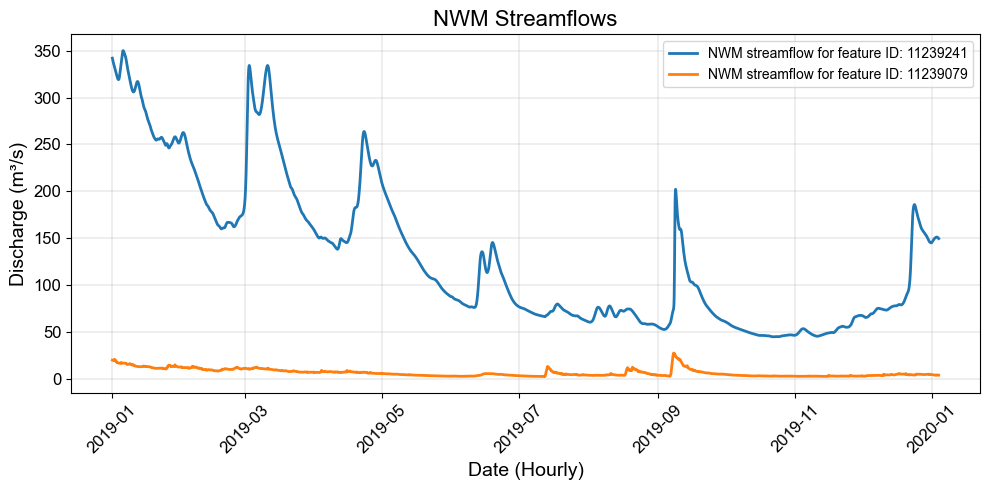

In [5]:
#User should know about the feature_id to plot the data
#Can input single or multiple feature_id
feature_id = ["11239241", "11239079"]
fm.plotNWMStreamflow(huc, feature_id)

**If you know  the USGS site nearby that feature_ID, get the USGS site data to make a comparision**

USGS discharge data saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/discharge/usgs_streamflow.


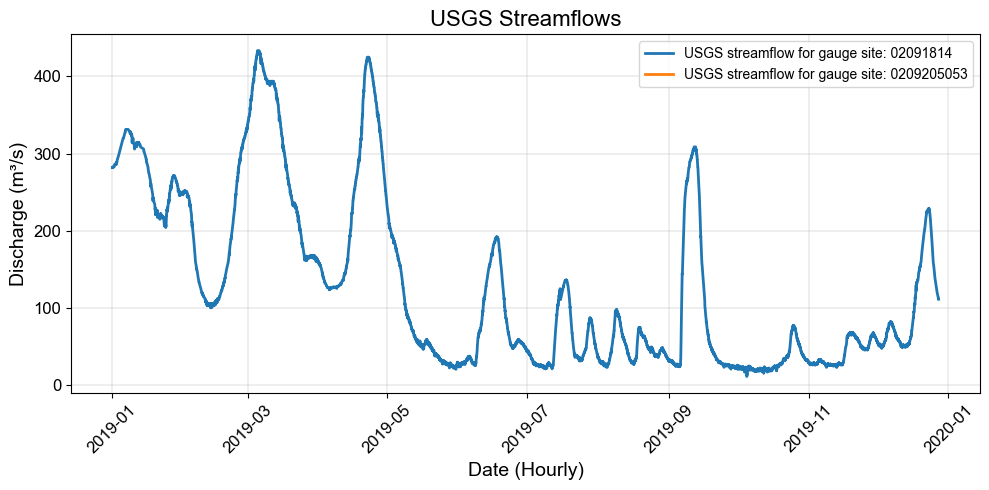

In [6]:
# To plot the USGS, First download the USGS site data for date range in sites
usgs_sites = ["02091814", "0209205053"]

start_date = "2019-01-01"
end_date = "2020-01-03"

fm.getUSGSsitedata(start_date, end_date, usgs_sites, huc)
fm.plotUSGSStreamflow(huc, usgs_sites)

**Once you have data from NWM and USGS both for same time range, make a comparision plot**


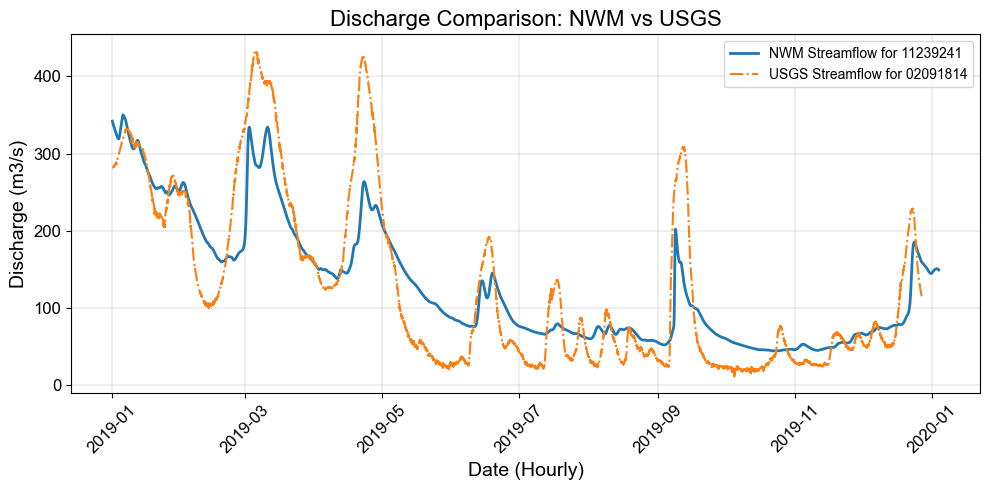

In [8]:
fm.CompareNWMnUSGSStreamflow(huc, feature_id[0], usgs_sites[0])

**If you want to see the synthetic rating curve for particular water body**

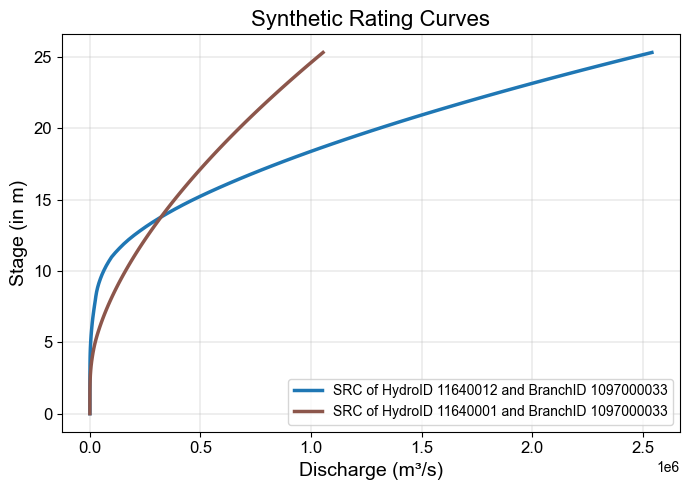

In [11]:
# to plot the SRC data user need the hydroID and corresponding branc ID
hydro_id = ["11640012", "11640001"]
branch_id = ["1097000033", "1097000033"]
dischargevalue = 600000

# User can pass the discharge value to get the stage value for that discharge
fm.plotSRC(huc, hydro_id, branch_id)

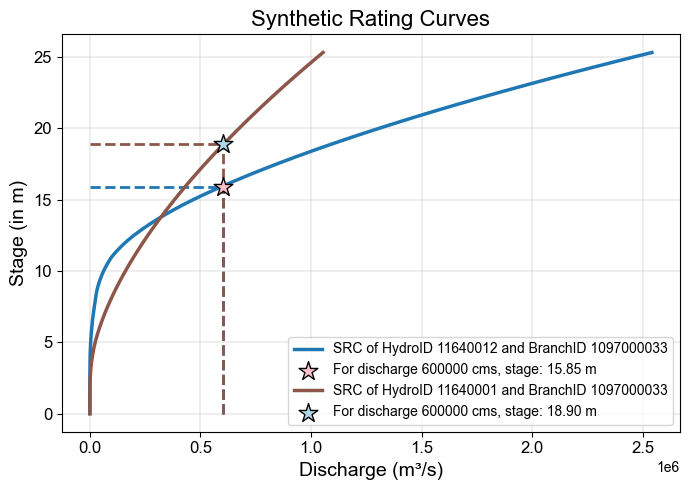

In [12]:
#With some discharge value to see the stage value
fm.plotSRC(huc, hydro_id, branch_id, dischargevalue)

#### **Get Forecasted data**

In [ ]:
# mention the forecast range as shortrange or mediumrange or longrange
forecast_range = "shortrange"
fm.getNWMForecasteddata(huc, forecast_range)

The final discharge values saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/data/inputs/shortrange_03020202.csv


In [14]:
# By default the data will be filtered based on maximum discharge value; User have option for getting maximum, minimum and median forecasted value
# Otherwise user need to mention
fm.getNWMForecasteddata(huc, forecast_range="shortrange", sort_by="maximum")
fm.getNWMForecasteddata(huc, forecast_range="longrange", sort_by="minimum")

The final discharge values saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/data/inputs/shortrange_03020202.csv
The final discharge values saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/data/inputs/longrange_03020202.csv


##### **Run the FIM to get flood inunation**

In [15]:
# run the FIM model, It will run the Hand model for the specified huc, if user is going through the multiple hucs, downloading discharge and everything for multiple huc , they can run it nicely for any number of HUC
fm.runOWPHANDFIM(huc)

Completed in 0.15 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.15 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.15 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.15 minutes.

Inundation mapping for 03020202 completed successfully.


#### **Subset FIM**

In [6]:
#There are two ways to run subsetting, one is user defined SHP, another is putting x, y  coordinate where user wants the FIM which should fall within the working HUC
# If user want to subset FIM from X, Y coord
location = [-77.505826, 35.323955]
fm.subsetFIM(location, huc, method="xy")

/Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/*_inundation.tif
point -77.505826 35.323955
Clipping /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/20200103_inundation.tif to watershed containing point 1656483.3036622105, 1524745.077604603
Clipped raster saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/subsetFIM/20200103_subsetFIM.tif
Clipping /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/20200101000000_inundation.tif to watershed containing point 1656483.3036622105, 1524745.077604603
Clipped raster saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/subsetFIM/20200101000000_subsetFIM.tif
Clipping /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/shortrange_inundation.tif to watershe

In [5]:
# If user want to subset FIM from boundary (shapefile)
location = '/Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/subsetBoundary/boundary.gpkg'
fm.subsetFIM(location, huc, method="boundary")

/Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/*_inundation.tif
Clipped raster saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/subsetFIM/20200103_subsetFIM.tif
Clipped raster saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/subsetFIM/20200101000000_subsetFIM.tif
Clipped raster saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/subsetFIM/shortrange_subsetFIM.tif
Clipped raster saved to /Users/supath/Downloads/MSResearch/CNN/fimPackage/docs/output/flood_03020202/03020202_inundation/subsetFIM/longrange_subsetFIM.tif
